In [42]:
!pip install plotly --upgrade


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
#Visualização dos dados
#df.head()

#df 

In [45]:
dados = pd.read_csv('credit_data.csv')

In [46]:
dados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [47]:
dados.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [48]:
dados[dados['income'] >= 69995] # pesquisa entre os dados

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


# Visualização dos dados

In [49]:
np.unique(dados['default'], return_counts=True) # mostra os registros encontrados 

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

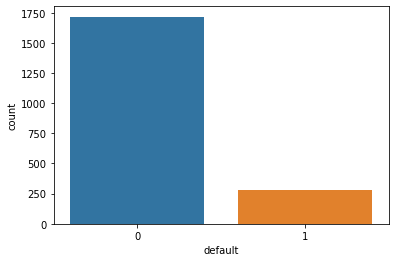

In [50]:
# 0 - pagante das dívidas e 1 - não pagante
# Quantidade de resgistros em cada classe
sns.countplot(x = dados['default']);


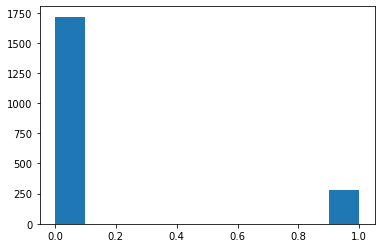

In [51]:
# Histograma
plt.hist(x = dados['default']);

In [52]:
grafico = px.scatter_matrix(dados, dimensions=['age', 'loan'], color='default')
grafico.show()

# Tratamento de valores inconsistente

In [53]:
# Localizar os valores
dados.loc[dados['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [54]:
dados['age'][dados['age'] > 0].mean()

40.92770044906149

### A apagar todos os valores da coluna
Mudando o valor de axis para 0 vai apagar a linha

```
dados2 = dados.drop('age, axis = 1)

```

### Apagar somente os registros inconsistentes
```
dados3 = dados.drop(dados[dados['age'] < 0]. index)
```

### Preencher os valores inconsistentes manualmente

### Preencher os valores com a média
Vai pegar a média dos valores, retirando os negativos
```
dados['age'][dados['age'] > 0].mean()
```
Vai trocar pelo valor escolhido
```
dados.loc[dados['age'] < 0]  = 40.92
```



In [55]:
dados.loc[dados['age'] < 0, 'age']  = 40.92
dados.loc[dados['age'] < 0] 


,clientid,income,age,loan,default


In [56]:
dados.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


# Tratar valores faltantes


In [57]:
# Somatório de valores faltantes por classe
dados.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [58]:
dados.loc[pd.isnull(dados['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [59]:
# Utilizando o pandas para preencher por meio da média 
dados['age'].fillna(dados['age'].mean(), inplace=True)


In [60]:
dados.loc[pd.isnull(dados['age'])]

,clientid,income,age,loan,default


In [61]:
dados.loc[dados['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


# Divisão entre os previsores e classe

In [62]:
x_dados = dados.iloc[:, 1:4].values
x_dados

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [63]:
y_dados = dados.iloc[:, 4].values
y_dados

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Escalonamento dos valores

In [64]:
x_dados[:, 0].min(), x_dados[:, 1].min(), x_dados[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [65]:
x_dados[:, 0].max(), x_dados[:, 1].max(), x_dados[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
x_dados = scaler_dados.fit_transform(x_dados)

In [67]:
x_dados[:, 0].min(), x_dados[:, 1].min(), x_dados[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [68]:
x_dados[:, 0].max(), x_dados[:, 1].max(), x_dados[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

# Divisão de treinamento e teste

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_dados, y_dados, test_size = 0.25, random_state = 0)

In [71]:
x_train.shape, y_train.shape

((1500, 3), (1500,))

In [72]:
x_test.shape, y_test.shape

((500, 3), (500,))

# Salvar as variáveis 

In [73]:
import pickle

In [74]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

# Naïve bayes

In [75]:
import pickle
with open('credit.pkl', mode = 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
naive_dados = GaussianNB()
naive_dados.fit(x_train, y_train)

GaussianNB()

In [78]:
previsão = naive_dados.predict(x_test)

In [79]:
previsão

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [87]:
# Mostra a porcentagem de acerto
accuracy_score(y_test, previsão)

0.938

In [88]:
# acertos e erros por coluna e coluna
confusion_matrix(y_test, previsão)

array([[428,   8],
       [ 23,  41]], dtype=int64)

0.938

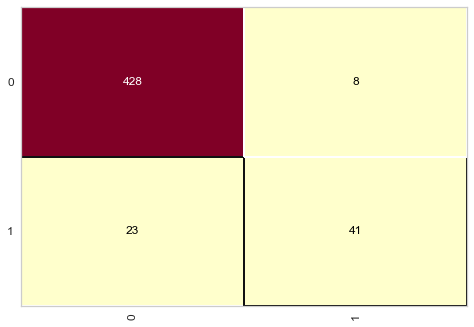

In [89]:
# Outra maneira de visualizar melhor os acertos e erros
cm = ConfusionMatrix(naive_dados)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [90]:
# Métricas
print(classification_report(y_test, previsão))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Árvore de Decisão 

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [92]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
previsao = arvore.predict(x_test)
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsao)

0.982

0.982

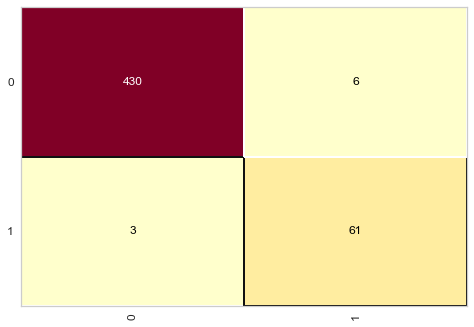

In [95]:
cm = ConfusionMatrix(arvore)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [96]:
print(classification_report(y_test, previsão))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



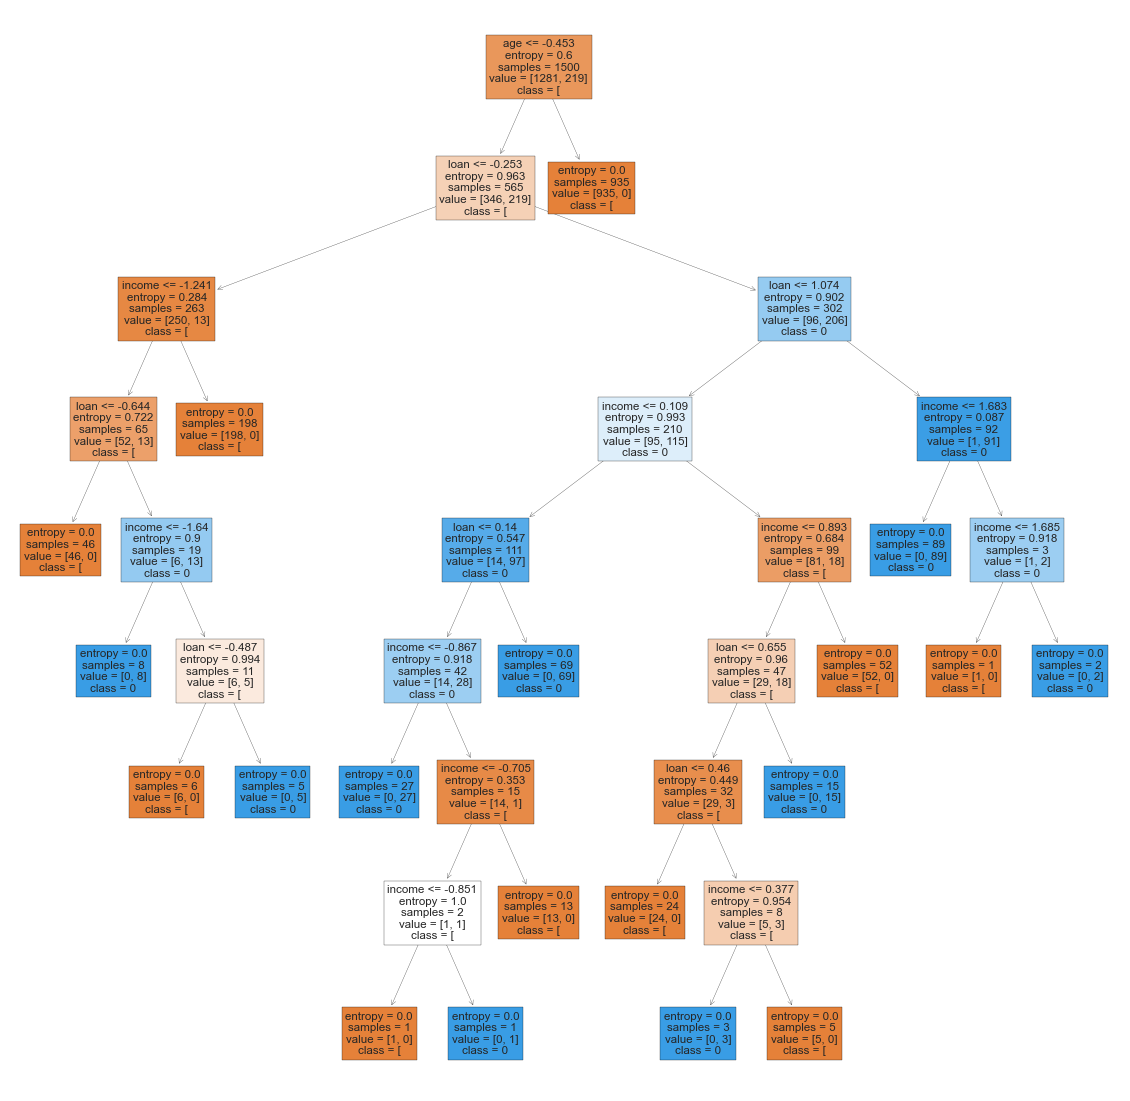

In [97]:
previsao = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
tree.plot_tree(arvore, feature_names=previsao, class_names=str(arvore.classes_), filled=True);


# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [100]:
previsores = random_forest.predict(x_test)
previsores

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
# 10 Árvores
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsores)

0.984

In [102]:
# 40 árvores
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsores)

0.984

In [103]:
# 100 árvores
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsores)

0.984

0.984

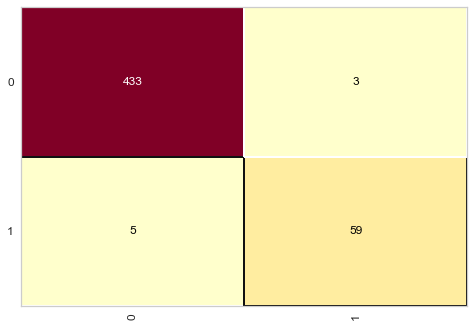

In [104]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [105]:
print(classification_report(y_test, previsores))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [108]:
previsor = knn.predict(x_test)
previsor

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
knn.score(x_train, y_train)


0.99

In [110]:
knn.score(x_test, y_test)

0.986